In [65]:
import pandas as pd


ct = r"C:\Users\mkreidler\Desktop\SHELL\ctrac.xlsx"
reg = r"C:\Users\mkreidler\Desktop\SHELL\register.xlsx"

ctrac = pd.read_excel(ct)
register = pd.read_excel(reg)

ctrac.head()

def clean(x):
    return str(x).replace("-E","-A").strip()

col2 = ["block_instance"]

ctrac.ctrac_name = ctrac.ctrac_name.str.replace("-E", "-A")
ctrac.ctrac_name = ctrac.ctrac_name.apply(clean)


ctrac["instance"] = ctrac.groupby("ctrac_name").cumcount() + 1

ctrac["block_instance"] = ctrac["ctrac_name"].map(str) + "[" + ctrac["instance"].map(str) + "]"

ctrac.loc[:, col2]

,block_instance
0,A1[1]
1,A1[2]
2,A2[1]
3,A2[2]
4,A2[3]
5,A2[4]
6,A2[5]
7,A2[6]
8,A2[7]
9,A2[8]


In [66]:
register.head()

,aconis,elevation,trc,bv,prod_status,ship_status,color,level,area,shipment,scope,register_name,color.1,bv.1,register_qty
0,AC765-FR-04,North,N-B05,A10A,SHPD,2019-08-12 00:00:00,F,12.0,Level 12,1.0,Replace,N-B05,F,A10A,1.0
1,AC765-FR-04,North,N-B06,A10A,NaN,2019-07-19 00:00:00,B,12.0,Level 12,1.0,Replace,N-B06,B,A10A,1.0
2,AC765-FR-04,North,N-B45,A10A,NaN,2019-08-12 00:00:00,B,12.0,Level 12,1.0,Replace,N-B45,B,A10A,1.0
3,AC765-FR-06,East,E-B08,A10B,NaN,2019-05-09 00:00:00,A,12.0,Level 12,1.0,Replace,E-B08,E,A10B,1.0
4,AC765-FR-06,East,E-B09,A10B,NaN,2019-04-05 00:00:00,B,12.0,Level 12,1.0,Replace,E-B09,B,A10B,1.0


In [67]:
register.bv = register.bv.str.replace("-E", "-A")

register["bvtc"] = register.bv + '-' + register.color

cols = ["trc", "bvtc", "level", "block_instance"]

register["instance"] = register.groupby("bvtc").cumcount() + 1



register["block_instance"] = register.bvtc + '[' + register.instance.map(str) +  "]"

register.loc[:, cols].sort_values("bvtc")



,trc,bvtc,level,block_instance
1,N-B06,A10A-B,12.0,A10A-B[1]
2,N-B45,A10A-B,12.0,A10A-B[2]
0,N-B05,A10A-F,12.0,A10A-F[1]
3,E-B08,A10B-A,12.0,A10B-A[1]
4,E-B09,A10B-B,12.0,A10B-B[1]
5,W-B02,A10B-C,12.0,A10B-C[1]
1636,N-B02,A10C-A,12.0,A10C-A[1]
1639,N-B46,A10D-D,12.0,A10D-D[1]
1640,W-B48,A10E-A,12.0,A10E-A[1]
9,TE-N06,A11L-F,13.0,A11L-F[1]


In [69]:
#ctrac.merge(register, on="block_instance", how="outer").to_excel(r"C:\Users\mkreidler\Desktop\SHELL\merge.xlsx")
merge_inner = ctrac.merge(register, on="block_instance", how="inner")
merge_outer = ctrac.merge(register, on="block_instance", how="outer")
merge_outer.to_excel(r"C:\Users\mkreidler\Desktop\SHELL\outer2.xlsx")




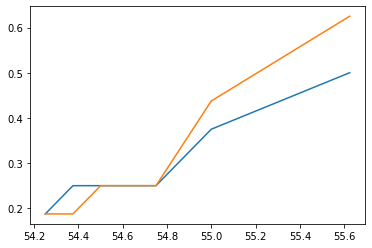

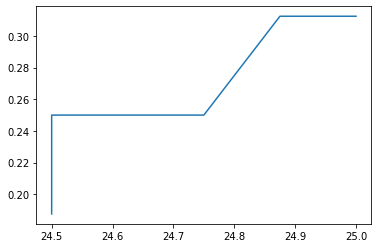

In [74]:
heights = r"C:\Users\mkreidler\Desktop\heights.xlsx"

ht = pd.read_excel(heights)

plt.plot(ht.height, ht.height_joint)
plt.show()